# Traversal of Space of Cross validation Folds for Imbalanced Classification

## The goal of task 4 is to investigate how the change in cross validation folds effects the performance of a given classifier. Building on task 2 from the winequality.csv dataset, the kNN and Decision Tree classifiers with the optimal hyperparameters are used in this exploration. 

## 1. Import Libraries and Modules

In [11]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [12]:
sys.path.append(os.path.abspath('../'))
import wineClassification
import traversalCrossValidation

## 2. Import Dataset

In [13]:
wineQuality = wineClassification.read_csv()
wineQuality = wineClassification.drop_quality_column(wineQuality, "quality")

FileNotFoundError: [Errno 2] File C:\Users\lmurphy4\.conda\envs\myEnv\forkproj\PRESC\dev\datasets\winequality.csv does not exist: 'C:\\Users\\lmurphy4\\.conda\\envs\\myEnv\\forkproj\\PRESC\\dev\\datasets\\winequality.csv'

## 3.Extract Features and Labels

### Wine Feature Matrix

In [4]:
recommend_features = wineClassification.extract_features(wineQuality)
recommend_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### Target Variable Recommend

In [5]:
recommend_labels = wineQuality["recommend"]
recommend_labels

0       False
1       False
2       False
3       False
4       False
        ...  
4893    False
4894    False
4895    False
4896     True
4897    False
Name: recommend, Length: 4898, dtype: bool

### Feature Scaling

In [6]:
recommend_features = wineClassification.feature_scaling(recommend_features)
recommend_features

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

### Label Encoding Target Variable(Recommend)

 - <font size='3'> Encode target labels with values 0(false) and 1(true)<font>

In [7]:
recommend_labels = wineClassification.label_encoding(wineQuality["recommend"])
recommend_labels

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## 4.Repeated Stratified K Fold Cross Validation

### Case of Imbalanced Datasets

 - <font size = '3'> When dealing with imbalanced datasets, it is important to ensure that the class distribution is maintained acrossall folds. if we were to use K Fold Cross Validation, we could not ensure that the class distribution would be preserved across every fold. In that case, the model may only be able to predict the majority class well, giving misleading results of how well our model is performing. Stratified K Fold ensures that we have the same porportion of both classes in every fold. Building on this, Repeated Stratified K Fold repeats the Stratified K Fold procedure n times. The dataset is randomly split into k folds over n number of iterations.Each iteration produces a different train/test split of the dataset</font>

### Function to Traverse Cross Validation Space

 - <font size='3'>The function cv_space_traversal takes in a classifier, the features of the dataset, the labels of the dataset, and the number of folds. it returns the average of the evaluation metrics accuracy, precision, and fbeta.</font> 

### Wine Recommendation Evaluation Metrics

 - <font size='3'>In the case of wine recommendations, we would want to limit the amount of false positives we have. It would be more costly to recommend a wine to a customer that turned out to be poor and disliked, rather than giving a poor wine review, only to have the wine to turn out to be greatly enjoyed. Since making a false positive classification is high, precision is a good metric because it measures how well a model predicts the positive class (in our case, great wine!). We can also look at F-measure as well, allowing precision and recall to be combined into one score. Specifically, I am using the Fbeta-measure, using a coefficient beta value of 0.5 because I want to scale more towards precision. </font>

## Traversal of Cross Validation Space with kNN Classifier

In [8]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform')
strat_knn_folds, strat_knn_accuracy, strat_knn_precision, strat_knn_recall, strat_knn_fbeta  = traversalCrossValidation.cv_space_traversal(knn, recommend_features, recommend_labels, 21)

### Average Metric Values Across Folds for kNN Classifier

In [9]:
strat_knn_table =  traversalCrossValidation.cross_val_table(strat_knn_folds, strat_knn_accuracy, strat_knn_precision, strat_knn_recall, strat_knn_fbeta)
strat_knn_table

,Folds,Average Accuracy Score,Average Precision Score,Average Recall Score,Average fbeta Score
0,2,0.828,0.604,0.599,0.603
1,3,0.837,0.621,0.629,0.622
2,4,0.844,0.637,0.649,0.638
3,5,0.848,0.645,0.658,0.646
4,6,0.850,0.651,0.664,0.652
5,7,0.852,0.655,0.669,0.656
6,8,0.854,0.659,0.674,0.660
7,9,0.855,0.662,0.678,0.664
8,10,0.856,0.666,0.680,0.667
9,11,0.857,0.667,0.681,0.668


### Average Accuracy Scores for kNN Classifier Across 20 Folds

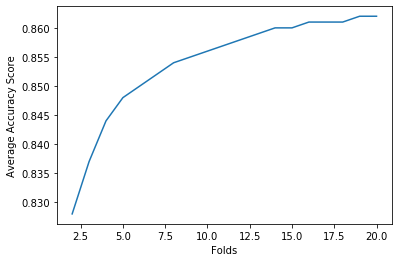

In [10]:
acc_knn_metric_plot = traversalCrossValidation.accuracy_lineplot_graph(strat_knn_table)
acc_knn_metric_plot

 - <font size='3'> Average accuracy scores see a gradual increase as the numbers of folds increase, from 0.83 at 2 folds to 
    0.86 at a max of 20 folds.</font>

### Average Precision Scores for kNN Classifier Across 20 Folds

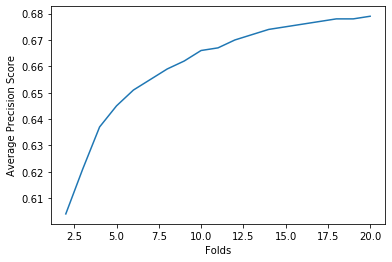

In [11]:
pre_knn_metric_plot = traversalCrossValidation.precision_lineplot_graph(strat_knn_table)
pre_knn_metric_plot

### Average Recall Scores for kNN Classifier Across 20 Folds

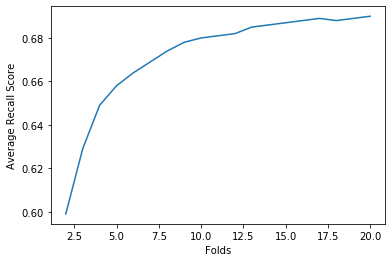

In [20]:
rec_knn_metric_plot = traversalCrossValidation.recall_lineplot_graph(strat_knn_table)
rec_knn_metric_plot

### Average fbeta Scores for kNN Across 20 Folds

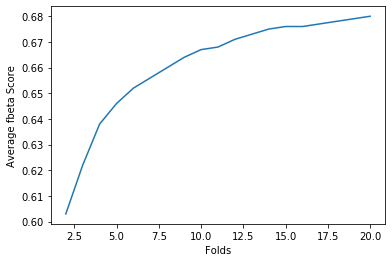

In [13]:
fb_knn_metric_plot = traversalCrossValidation.fbeta_lineplot_graph(strat_knn_table)
fb_knn_metric_plot

 - <font size='3'>As the number of folds increase from 2 to 8 folds, precision and fbeta scores rise from 0.61 to 0.66, and then continues to have a gradual increase from 10 to 20 folds.</font>

## Traversal of Cross Validation Space with Decision Tree Classifier

In [14]:
dt = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best')
strat_dt_folds, strat_dt_accuracy, strat_dt_precision, strat_dt_recall, strat_knn_fbeta  = traversalCrossValidation.cv_space_traversal(dt, recommend_features, recommend_labels, 21)

### Average Metric Values Across Folds for Decision Tree Classifier

In [15]:
strat_dt_table =  traversalCrossValidation.cross_val_table(strat_dt_folds, strat_dt_accuracy, strat_dt_precision, strat_dt_recall, strat_knn_fbeta)
strat_dt_table

,Folds,Average Accuracy Score,Average Precision Score,Average Recall Score,Average fbeta Score
0,2,0.802,0.553,0.482,0.545
1,3,0.805,0.556,0.499,0.550
2,4,0.810,0.568,0.516,0.563
3,5,0.810,0.570,0.508,0.564
4,6,0.811,0.572,0.519,0.566
5,7,0.812,0.575,0.516,0.569
6,8,0.812,0.575,0.517,0.569
7,9,0.813,0.578,0.523,0.572
8,10,0.814,0.578,0.522,0.572
9,11,0.815,0.582,0.523,0.576


### Average Accuracy Scores for Decision Tree Classifier Across 20 Folds

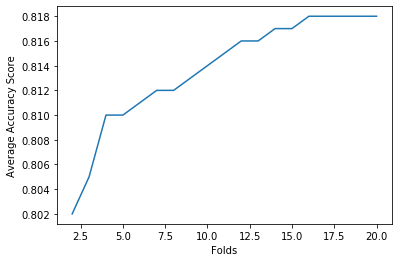

In [16]:
acc_dt_metric_plot = traversalCrossValidation.accuracy_lineplot_graph(strat_dt_table)
acc_dt_metric_plot

 - <font size='3'> Average accuracy scores see a gradual increase as the numbers of folds increase. </font>

### Average Precision Scores for Decision Tree Classifier Across 20 Folds

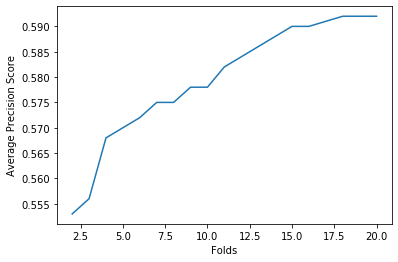

In [17]:
pre_dt_metric_plot = traversalCrossValidation.precision_lineplot_graph(strat_dt_table)
pre_dt_metric_plot

### Average Recall Scores for Decision Tree Classifier Across 20 Folds

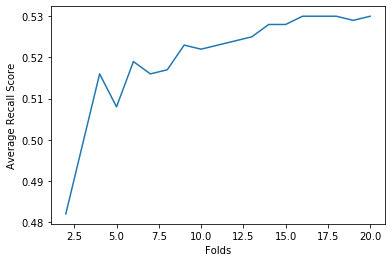

In [18]:
rec_dt_metric_plot = traversalCrossValidation.recall_lineplot_graph(strat_dt_table)
rec_dt_metric_plot

### Average fbeta Scores for Decision Tree Classifier Across 20 Folds

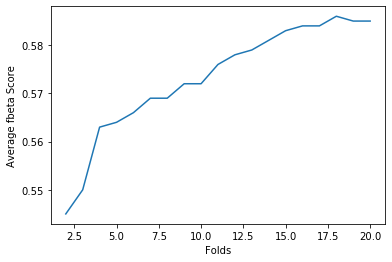

In [19]:
fb_dt_metric_plot = traversalCrossValidation.fbeta_lineplot_graph(strat_dt_table)
fb_dt_metric_plot

 - <font size='3'> As the number of folds increase from 2 to 8 folds, precision and fbeta scores rise from 0.52 to 0.58, and then continues to have a gradual increase from 10 to 20 folds. </font> 

 - <font size='3'>Across folds, kNN had a max accuracy score 0f 0.86 (compared to Decision Tree of around 0.83), and was also better able to predict the positive class, specifically making a favorable wine recommendation that turned out to be accurate.</font> 